In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

2023-12-22 22:58:54.700906: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-22 22:58:54.748082: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 22:58:54.748112: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 22:58:54.749270: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-22 22:58:54.756579: I tensorflow/core/platform/cpu_feature_guar

In [3]:
df = pd.read_csv('data/spotify.csv')
df.shape

(17643, 21)

Dataset from kaggle: https://www.kaggle.com/datasets/thedevastator/spotify-tracks-genre-dataset/data

In [4]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,...,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,...,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,...,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,...,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,...,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic


In [5]:
df.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
17638,17638,6nljbSma4YDzJJEcnLQ3oF,The Softies,Holiday In Rhode Island,Holiday In Rhode Island,19.0,115826.0,False,0.618,0.295,...,-8.871,0.0,0.0310,0.861000,0.000006,0.1380,0.129,126.026,4.0,club
17639,17639,4klAoEgBUf5caLNhU4dR8S,Neoslave,Autoviolator,Cross of Fire,17.0,230500.0,False,0.587,0.767,...,-4.620,0.0,0.0314,0.006740,0.964000,0.1760,0.408,120.020,4.0,club
17640,17640,3toYsd6LHT1HVr8eGQoApk,Neoslave,From Womb to Doom,Necrodancer,17.0,280000.0,True,0.423,0.875,...,-7.303,1.0,0.0640,0.000224,0.900000,0.1100,0.173,75.146,4.0,club
17641,17641,0tv7AfxhAdba4daHMbaZLw,Glee Cast;Darren Criss,Glee Love Songs,Teenage Dream (feat. Darren Criss),42.0,220373.0,False,0.760,0.543,...,-5.759,1.0,0.0415,0.494000,0.000000,0.0802,0.840,120.003,4.0,club
17642,17642,5SekMqPSRq3YUrezggydWs,Lil E,E,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.loc[300] #tester for test.py

Unnamed: 0                                  300
track_id                 2C9ePPz58he8jmYEod9pvT
artists                         Callum J Wright
album_name          Isn't She Lovely (Acoustic)
track_name          Isn't She Lovely - Acoustic
popularity                                 54.0
duration_ms                            145771.0
explicit                                  False
danceability                               0.69
energy                                    0.306
key                                         9.0
loudness                                 -9.193
mode                                        1.0
speechiness                              0.0356
acousticness                              0.805
instrumentalness                            0.0
liveness                                 0.0968
valence                                   0.424
tempo                                   115.671
time_signature                              4.0
track_genre                            a

# EDA and data pre-processing

- Check and fix dtypes
- Check and fix null values
- Stats for numerical columns
- Subset data for use with prophet
- Visualize

In [7]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [8]:
df = df.drop(["Unnamed: 0", "track_id"], axis = 1)
df

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.032200,0.000001,0.3580,0.715,87.917,4.0,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.924000,0.000006,0.1010,0.267,77.489,4.0,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.210000,0.000000,0.1170,0.120,76.332,4.0,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.905000,0.000071,0.1320,0.143,181.740,3.0,acoustic
4,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.469000,0.000000,0.0829,0.167,119.949,4.0,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17638,The Softies,Holiday In Rhode Island,Holiday In Rhode Island,19.0,115826.0,False,0.618,0.2950,9.0,-8.871,0.0,0.0310,0.861000,0.000006,0.1380,0.129,126.026,4.0,club
17639,Neoslave,Autoviolator,Cross of Fire,17.0,230500.0,False,0.587,0.7670,10.0,-4.620,0.0,0.0314,0.006740,0.964000,0.1760,0.408,120.020,4.0,club
17640,Neoslave,From Womb to Doom,Necrodancer,17.0,280000.0,True,0.423,0.8750,1.0,-7.303,1.0,0.0640,0.000224,0.900000,0.1100,0.173,75.146,4.0,club
17641,Glee Cast;Darren Criss,Glee Love Songs,Teenage Dream (feat. Darren Criss),42.0,220373.0,False,0.760,0.5430,3.0,-5.759,1.0,0.0415,0.494000,0.000000,0.0802,0.840,120.003,4.0,club


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17643 entries, 0 to 17642
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           17643 non-null  object 
 1   album_name        17643 non-null  object 
 2   track_name        17642 non-null  object 
 3   popularity        17642 non-null  float64
 4   duration_ms       17642 non-null  float64
 5   explicit          17642 non-null  object 
 6   danceability      17642 non-null  float64
 7   energy            17642 non-null  float64
 8   key               17642 non-null  float64
 9   loudness          17642 non-null  float64
 10  mode              17642 non-null  float64
 11  speechiness       17642 non-null  float64
 12  acousticness      17642 non-null  float64
 13  instrumentalness  17642 non-null  float64
 14  liveness          17642 non-null  float64
 15  valence           17642 non-null  float64
 16  tempo             17642 non-null  float6

In [12]:
df["explicit"] = df["explicit"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17642 entries, 0 to 17641
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           17642 non-null  object 
 1   album_name        17642 non-null  object 
 2   track_name        17642 non-null  object 
 3   popularity        17642 non-null  float64
 4   duration_ms       17642 non-null  float64
 5   explicit          17642 non-null  int64  
 6   danceability      17642 non-null  float64
 7   energy            17642 non-null  float64
 8   key               17642 non-null  float64
 9   loudness          17642 non-null  float64
 10  mode              17642 non-null  float64
 11  speechiness       17642 non-null  float64
 12  acousticness      17642 non-null  float64
 13  instrumentalness  17642 non-null  float64
 14  liveness          17642 non-null  float64
 15  valence           17642 non-null  float64
 16  tempo             17642 non-null  float6

/tmp/ipykernel_234/1535172463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["explicit"] = df["explicit"].astype(int)


In [13]:
df.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [14]:
df = df.dropna() #deleting the few small null raws
df.isnull().sum()

artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [15]:
df.dtypes

artists              object
album_name           object
track_name           object
popularity          float64
duration_ms         float64
explicit              int64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
track_genre          object
dtype: object

In [16]:
# stats for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,17642.0,32.802914,21.659387,0.000000,16.0000,33.000000,50.00000,93.000
duration_ms,17642.0,238531.890715,141356.418756,17453.000000,173147.0000,221229.000000,275968.25000,4789026.000
explicit,17642.0,0.052205,0.222446,0.000000,0.0000,0.000000,0.00000,1.000
danceability,17642.0,0.555609,0.181560,0.000000,0.4370,0.570000,0.68900,0.981
energy,17642.0,0.582111,0.272656,0.000756,0.3730,0.609000,0.82475,1.000
key,17642.0,5.311189,3.563188,0.000000,2.0000,5.000000,9.00000,11.000
loudness,17642.0,-9.533904,5.746593,-41.808000,-11.4830,-8.012000,-5.73525,4.532
mode,17642.0,0.664664,0.472121,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,17642.0,0.069471,0.073102,0.000000,0.0341,0.044500,0.06940,0.943
acousticness,17642.0,0.370660,0.359350,0.000000,0.0164,0.256000,0.72100,0.996


In [17]:
strings = list(df.dtypes[df.dtypes == 'object'].index) #ottengo gli indici che hanno solo valori string
strings

['artists', 'album_name', 'track_name', 'track_genre']

<Axes: xlabel='danceability', ylabel='Count'>

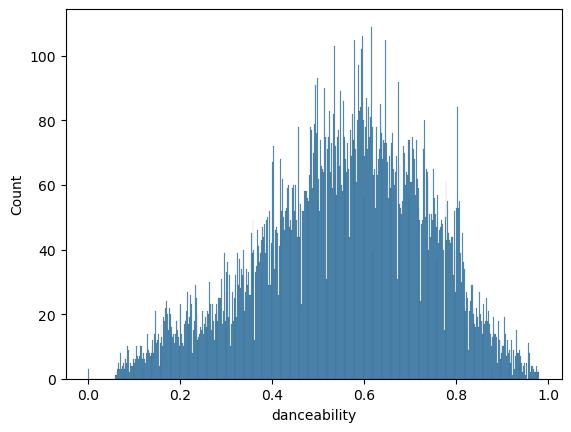

In [18]:
sns.histplot(df.danceability, bins=500)

<Axes: xlabel='energy', ylabel='Count'>

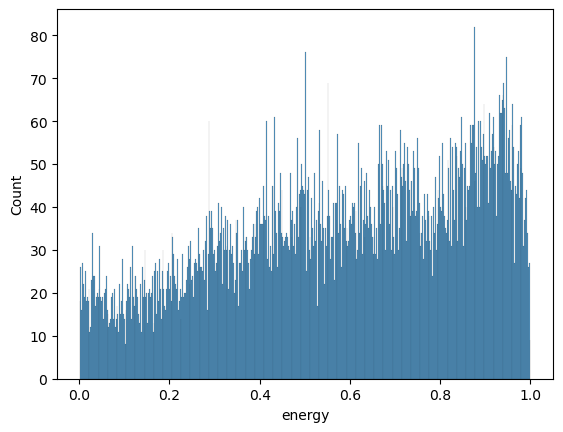

In [19]:
sns.histplot(df.energy, bins=500)

<Axes: xlabel='liveness', ylabel='Count'>

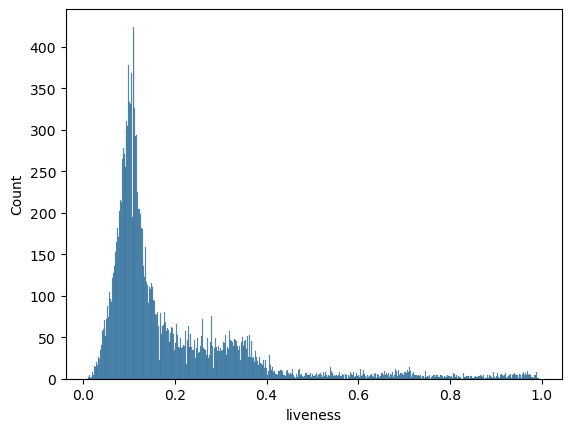

In [20]:
sns.histplot(df.liveness, bins=500)

<Axes: xlabel='loudness', ylabel='Count'>

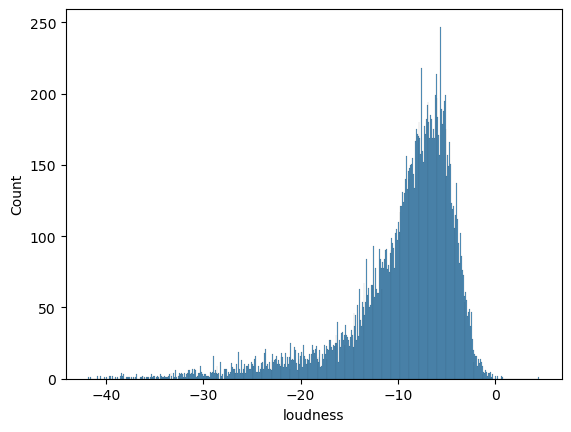

In [21]:
sns.histplot(df.loudness, bins=500)

<Axes: xlabel='tempo', ylabel='Count'>

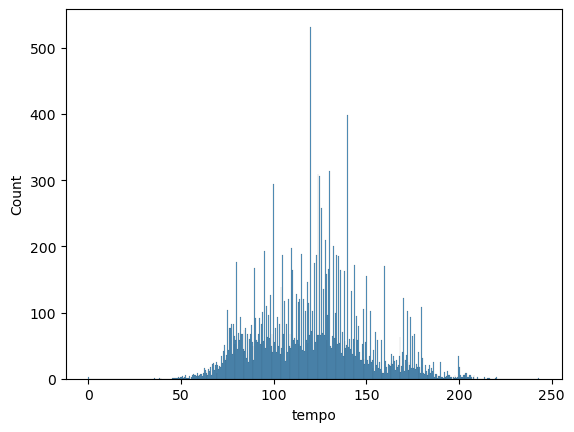

In [22]:
sns.histplot(df.tempo, bins=500)

<Axes: xlabel='valence', ylabel='Count'>

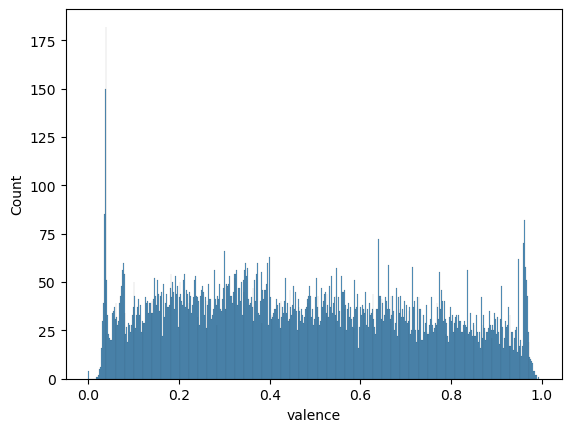

In [23]:
sns.histplot(df.valence, bins=500)

<Axes: xlabel='acousticness', ylabel='Count'>

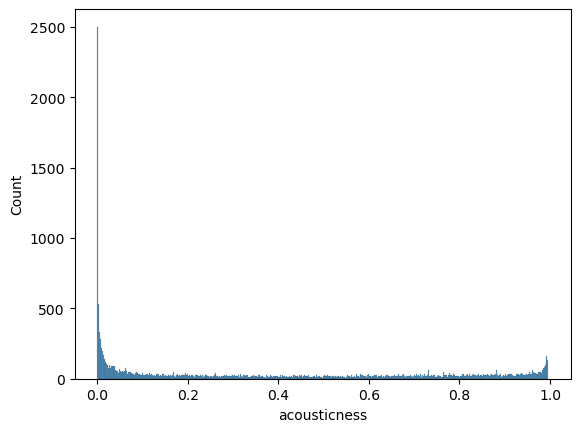

In [24]:
sns.histplot(df.acousticness, bins=500)

<Axes: xlabel='duration_ms', ylabel='Count'>

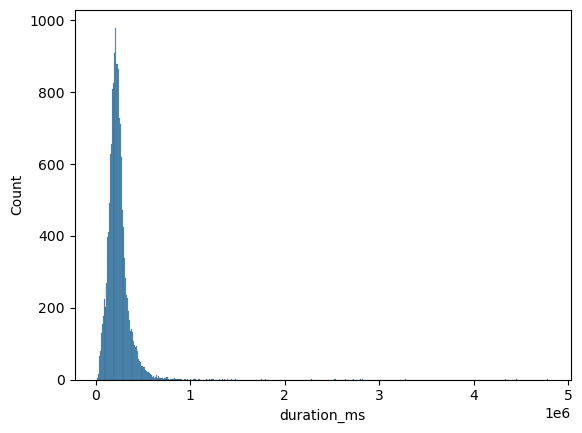

In [25]:
sns.histplot(df.duration_ms, bins=500)

In [26]:
df['duration_ms'] = np.log1p(df['duration_ms'])

<Axes: xlabel='duration_ms', ylabel='Count'>

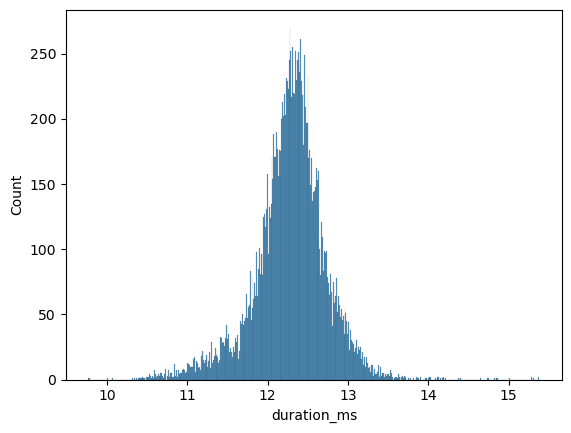

In [27]:
sns.histplot(df.duration_ms, bins=500)

In [30]:
df.track_genre.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club'], dtype=object)

In [31]:
for col in strings: #loop per ogni colonna
    df[col] = df[col].str.lower()

In [32]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) #stampo solo i primi 5 valori diversi
    print(df[col].nunique())
    print()

artists
['gen hoshino' 'ben woodward' 'ingrid michaelson;zayn' 'kina grannis'
 'chord overstreet']
5572

album_name
['comedy' 'ghost (acoustic)' 'to begin again'
 'crazy rich asians (original motion picture soundtrack)' 'hold on']
9210

track_name
['comedy' 'ghost - acoustic' 'to begin again' "can't help falling in love"
 'hold on']
14487

popularity
[73. 55. 57. 71. 82.]
89

duration_ms
[12.34873039 11.91579387 12.25879317 12.21569619 12.20032617]
13370

explicit
[0 1]
2

danceability
[0.676 0.42  0.438 0.266 0.618]
955

energy
[0.461  0.166  0.359  0.0596 0.443 ]
1494

key
[ 1.  0.  2.  6. 11.]
12

loudness
[ -6.746 -17.235  -9.734 -18.515  -9.681]
9828

mode
[0. 1.]
2

speechiness
[0.143  0.0763 0.0557 0.0363 0.0526]
1162

acousticness
[0.0322 0.924  0.21   0.905  0.469 ]
3595

instrumentalness
[1.01e-06 5.56e-06 0.00e+00 7.07e-05 2.89e-06]
3868

liveness
[0.358  0.101  0.117  0.132  0.0829]
1522

valence
[0.715 0.267 0.12  0.143 0.167]
1462

tempo
[ 87.917  77.489  76.332 181.74  1

# Splitting the Data

In [33]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [34]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [35]:
len(df_train), len(df_test), len(df_val)

(10584, 3529, 3529)

In [36]:
y_train = df_train.popularity
y_val = df_val.popularity
y_test = df_test.popularity
y_full_train = df_full_train.popularity

In [37]:
del df_train['popularity']
del df_val['popularity']
del df_test['popularity']
del df_full_train['popularity']

In [38]:
def rmse(y, y_pred):
    error = y - y_pred #calcolo errore tra i 2 array
    se = error **2 #quadrato della differenza
    mse = se.mean() #media della differenza
    return np.sqrt(mse) #radice del valore medio

# DECISION TREES

In [39]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [40]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [41]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [42]:
y_pred = dt.predict(X_val)
y_pred

array([44., 32., 74., ..., 45., 16., 71.])

In [43]:
rmse(y_val, y_pred)

17.73980735772687

In [44]:
#train
dicts_ft = df_full_train.to_dict(orient='records')
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dicts_ft)
    
dt = DecisionTreeRegressor()
dt.fit(X_full_train, y_full_train)
#predict
dicts_test = df_test.to_dict(orient='records')
   
X_test = dv.transform(dicts_test)
y_pred = dt.predict(X_test)

_rmse = rmse(y_test, y_pred)
_rmse

16.885543052637896

In [45]:
scores = []

for d in [1,2,5,10,20,50,100,200,500, None]: 
    for s in [1,2,5,10,20,50,100,200,500]: 
        dt = DecisionTreeRegressor( max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict(X_val)
        _rmse = rmse(y_val, y_pred)
        scores.append((d,s,_rmse))
        print((d,s,_rmse))
col = ['max_depth', 'min_samples_leaf', 'rmse']
df_scores = pd.DataFrame(scores, columns=col)
df_scores

(1, 1, 21.16067670448737)
(1, 2, 21.16067670448737)
(1, 5, 21.16067670448737)
(1, 10, 21.16067670448737)
(1, 20, 21.16067670448737)
(1, 50, 21.16067670448737)
(1, 100, 21.16067670448737)
(1, 200, 21.16067670448737)
(1, 500, 21.16067670448737)
(2, 1, 20.54507959292357)
(2, 2, 20.54507959292357)
(2, 5, 20.54507959292357)
(2, 10, 20.54507959292357)
(2, 20, 20.54507959292357)
(2, 50, 20.544077765872103)
(2, 100, 20.531804767629975)
(2, 200, 20.531804767629975)
(2, 500, 20.533305931264614)
(5, 1, 19.240152821772032)
(5, 2, 19.260530126805158)
(5, 5, 19.281847834092094)
(5, 10, 19.30134229647501)
(5, 20, 19.294456778034775)
(5, 50, 19.266053535465655)
(5, 100, 19.29972245755107)
(5, 200, 19.29355302057906)
(5, 500, 19.322716634354325)
(10, 1, 17.946774375036636)
(10, 2, 17.8805232025986)
(10, 5, 17.991266555908958)
(10, 10, 18.063772226743843)
(10, 20, 18.267117365497523)
(10, 50, 18.164669185894937)
(10, 100, 18.207387684016727)
(10, 200, 18.19588141709861)
(10, 500, 18.28060687535084)
(20,

,max_depth,min_samples_leaf,rmse
0,1.0,1,21.160677
1,1.0,2,21.160677
2,1.0,5,21.160677
3,1.0,10,21.160677
4,1.0,20,21.160677
...,...,...,...
85,NaN,20,18.096592
86,NaN,50,17.914237
87,NaN,100,17.876388
88,NaN,200,18.027697


In [46]:
df_scores.sort_values(by='rmse', ascending=True)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', 
                columns=['max_depth'],
                values=['rmse'])
df_scores_pivot.round(3)

rmse                                                  \
max_depth            NaN   1.0     2.0     5.0     10.0    20.0    50.0    
min_samples_leaf                                                           
1                 17.418  21.161  20.545  19.240  17.947  17.350  17.789   
2                 19.212  21.161  20.545  19.261  17.881  17.591  18.002   
5                 18.495  21.161  20.545  19.282  17.991  17.509  17.898   
10                18.341  21.161  20.545  19.301  18.064  17.629  18.344   
20                18.097  21.161  20.545  19.294  18.267  17.698  18.097   
50                17.914  21.161  20.544  19.266  18.165  17.847  17.914   
100               17.876  21.161  20.532  19.300  18.207  17.861  17.876   
200               18.028  21.161  20.532  19.294  18.196  18.028  18.028   
500               18.254  21.161  20.533  19.323  18.281  18.254  18.254   

                                          
max_depth          100.0   200.0   500.0  
min_samples_leaf                          
1                 17.267  18.461  17.786  
2                 18.467  18.421  18.395  
5                 18.559  18.482  18.557  
10                18.347  18.350  18.320  
20                18.097  18.097  18.097  
50                17.914  17.914  17.914  
100               17.876  17.876  17.876  
200               18.028  18.028  18.028  
500               18.254  18.254  18.254

<Axes: xlabel='popularity', ylabel='Count'>

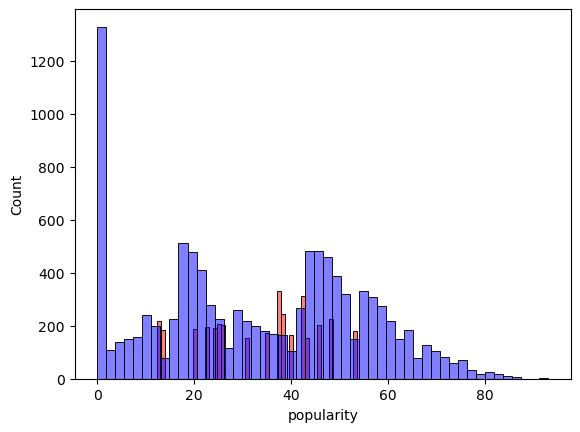

In [47]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50) #predictions
sns.histplot(y_train, color='blue', alpha=0.5, bins=50) #target values

# RANDOM FOREST

In [50]:
scores = []
for s in [1, 10, 50]:
    for n in range(10, 201, 50):
        for m in [50, 100]:
            rf = RandomForestRegressor(n_estimators=n, 
                                        max_depth=m,
                                        min_samples_leaf=s,
                                        random_state=1) 
            rf.fit(X_train, y_train)

            y_pred = rf.predict(X_val)
            _rmse = rmse(y_val, y_pred)
            scores.append((s, n, _rmse))

            print((s, n, m, _rmse))

KeyboardInterrupt: 

In [ ]:
#The best: -> DA MODIFICARE
#train
dicts_ft = df_full_train.to_dict(orient='records')
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dicts_ft)
    
rf = RandomForestRegressor(n_estimators=110, 
                           max_depth= 160,
                           min_samples_leaf=100,
                           random_state=1)
rf.fit(X_full_train, y_full_train)
#predict
dicts_test = df_test.to_dict(orient='records')
   
X_test = dv.transform(dicts_test)
y_pred = rf.predict(X_test)

_rmse = rmse(y_test, y_pred)
_rmse